In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="EDIT/PRESENT MODE"></form>''')

## Model choices
<font color=green>###Close section</font> <br>

<font color=green>**Mass Spring Model with nearest and second nearest springs is stable. Use this model**</font>

Solid models have to be choosen that allows modification of the Elastic modulus with change of a single variable. Two options available so far, <br>

1. Simple Lattice Spring models, that follow E $\alpha$ k/a scaling __[Paper1](https://link.springer.com/content/pdf/10.1007%2Fs00371-014-1015-5.pdf)__

2. Morse potentials for more realistic solids for fcc and bcc structures __[Paper2](https://aip.scitation.org/doi/pdf/10.1063/1.2198112)__

***
EAM seems like an option --- widely used, but surface atoms are not modelled accurately __[Paper3](https://arxiv.org/ftp/arxiv/papers/1209/1209.4568.pdf)__
<br>**Modeling Surface atoms is paramount**

*** 

<div class="alert alert-block alert-info"> Possible options <br> 1. LJ <br> 2. EAM and an updated version [Paper3] <br> 3. Bonds with Morse or <font color=green>Harmoic potentials</font></div>


### Water Model
SPCE @ 300 K <br>

| $\sigma_O$ | $\epsilon_O(kcal/mol)$ | Cut-off | Long-range 
|------------| ---------------------- | ------- |---------- | 
| 3.166 | 0.15535 | 12 | PPPM/kspace diff ad | 

### Water-Solid

| $\sigma_{CO}$ | $\epsilon_{CO}(kcal/mol)$ | Cut-off | Long-range 
|------------| ---------------------- | ------- |---------- | 
| 3.3525 | 0.01-1 | 12 | None |

<br>

### Solid Model
1. MSM with nearest neighbor and second nearest neighbor interactions.
2. Interactions mediated by harmonic springs. 
3. K is chosen based on the solid elastic modulus. 

<img src="files/solidmodel.jpg">

__[Input file](Inputfile.ipynb)__ 

A. Droplet Box dimesions

B. Cylindrical droplet, with thick solid surface (8 layers)

C. Number of water molecules 6400 --- computed assuming 90 degree contact angle and the droplet forms a hemisphere --- with dimensions 60 in y and radius 45 in x

###Sizes:

|X ($\AA$) | Y |Z|Nwater|Nsolid
|---|---|---| ---|---|
| 350 | 60| 180| 6400|36000

# Droplet Induced stress on solid surfaces
## Problem to be Addressed 
We would like to figure out how droplet induced stress decays around the contact line. This information could be used to apply the Young's equation locally and accordingly study the structure of solid or droplet. 

<font color=red>Important</font>: To realize that the term that enters the Young's equation should be the interfacial tensions (for the solid) and not the free-energy values.

First, we considered a water droplet on the surface of graphene. However, this problems make the study too specific, especially given that graphene has a high in-plane elastic modulus (~1TPa). To perform a systematic system, we now choose simple solid models with known elastic modulus and then simulate water droplets at various interaction strengths to see how the induced stress decays around the contact line. 

<font color=green>**To study this, we need the following**</font>
    1. Several solid models with known (estimated) Young's modulus <font color=red> 
        **Modulus** is anisotropic, should consider that ---- solution is to use an isotropic solid
    2. Water model, SPC/E @300K, 1 atm (check)
    3. Sufficiently characterised water-solid interaction. Based on work of adhesion or $\epsilon$ alone is fine, if the lattice constant of the surface remains constant.

<font color=green>**Modeling strategy**</font>
    1. Estimate Elastic moduli of solids
        By modeling at least at 3 different deformations 
        Should be varied in a range of at least 2 orders of magnitude (1 GPa to 1000 GPa preferably)
    2. Create a droplet on surfaces and equilibrate
    3. Study a reference solid with the exact same structure without the droplet
    4. Now, compute the droplet induced stresses and its spatial distribution
    5. Tadaa!

## Parameter space
-  $\epsilon_{SL}$
-  Young's modulus of the solid

<img src="files/vmdscene.bmp">

#THEORY

1. Bulk Modulus and Cohesive Energy
\begin{align}
B & = V^2\frac{\partial ^2E}{\partial V^2} = -V\frac{\partial P}{\partial V}
\end{align}

2. Simple Cubic crystal (with atoms only on the edges of the cube) has 3 independent Elastic constants
    C11 (Young's Modulus)
    C12 (Modulus relating the stress in the direction perpendicular to the strain)
    C44 (Shear Modulus)
    The above constants could be computed by imposing a strain in x and measuring $\sigma_{xx}$, $\sigma_{yy}$ and $\sigma_{zz}$
    Bulk Modulus is given by, $B=\frac{C11+2C12}{2}$

3. Obtaining Elastic Modulus by deforming the box, <font color=Green> MD</font>  __[Paper](http://iopscience.iop.org/article/10.1088/0268-1242/21/7/014/pdf)__ <br>
    
    a. A rigorous formulation <br>
    b. Deforms the entire volume or multiple directions <br>
    c. Calls C11-C12 as the shear modulus (?) and also C44 

##**References**<br>
  1. Quick review of elasticity __[MIT notes](http://web.mit.edu/16.20/homepage/3_Constitutive/Constitutive_files/module_3_with_solutions.pdf)__
  2. On moduli of fcc and bcc crystals __[SciHub]("http://sci-hub.tw/10.1016/0956-7151(92\)90421-a#")__
  3. More Baiscs and symmetries __[SciHub](https://sci-hub.tw/https://www.sciencedirect.com/science/article/pii/S1079404201800849)__
  4. Heinz LJ potentials __[Heinz](https://pubs.acs.org/doi/pdf/10.1021/jp801931d)__
  5. <font color=green>MD</font> Tutorial of determining Elastic properties of simple crystals __[Paper](http://micro.stanford.edu/mediawiki/images/8/83/Cnm_chap128_draft.pdf)__
  6. Basic Symmetries __[Lecture Notes](https://serc.carleton.edu/NAGTWorkshops/mineralogy/mineral_physics/tensors.html)__
  


#### Input files
__[Inputs](Inputfile.ipynb)__

### Data and Plots

In [4]:
### Get the essential libraries
%matplotlib inline
#%pylab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
#import pip
#!python -m pip install --upgrade pip
#pip.main(['install',mpld3])
#!pip install mpld3
#import mpld3
#from mpl_toolkits.mplot3d import Axes3D

#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

Coefficients (ax**3+bx*x+cx+d): a=-135.23465	b=477.82334	c=363.37472	c=-2.82415
Coefficients (ax**3+bx*x+cx+d): a=-522.16011	b=834.00078	c=325.74304	c=-12.25984


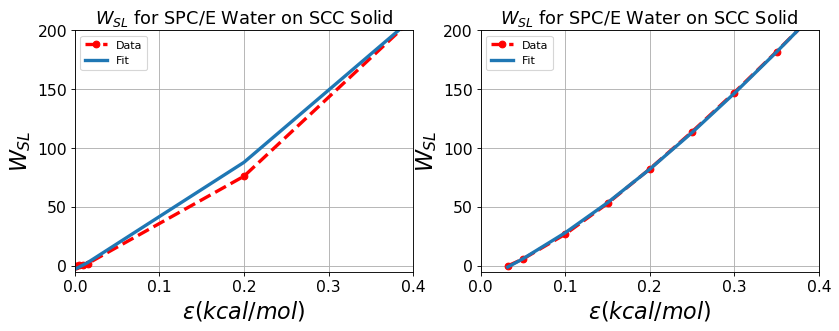

In [37]:
#Read and adjust data
FILES=np.array(['WSL_0.txt','WSL_1.txt'])
figure=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
import pylab
j=1

for i in FILES:
    d=pd.read_table(i,delimiter=' ',names=['eps','R','R_std'])
    dr=d.dropna()

## Transform Data 
    N=len(dr.R)
    W=np.zeros(N)
    for i in range(N):
        W[i]=-np.trapz(dr.R[:i+1],dr.eps[:i+1])
        #print W[i]

## Fit data
    fitfunc = lambda p, x: p[0]*x*x*x+ p[1]*x*x+p[2]*x+p[3] # Target function
    errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function

    p0 = [1., 0.8, 0., -1.] # Initial guess for the parameters
    p1, success = optimize.leastsq(errfunc, p0[:], args=(dr.eps, W))

    print("Coefficients (ax**3+bx*x+cx+d): a=%4.5f\tb=%4.5f\tc=%4.5f\tc=%4.5f" % (p1[0],p1[1],p1[2],p1[3]))

## Plot and label
    ax1=figure.add_subplot(1,2,j)
    ax1.plot(dr.eps,W,'ro--',dr.eps,fitfunc(p1,dr.eps),linewidth=3.0)
    ax1.set_xlabel('$\epsilon(kcal/mol)$',fontsize=20)
    ax1.set_ylabel("$W_{SL}$",fontsize=20)
    ax1.set_title('$W_{SL}$ for SPC/E Water on SCC Solid',fontsize=16)
    ax1.legend(['Data','Fit'],loc=2)
    ax1.tick_params(axis = 'both', which = 'major', labelsize = 14)
    ax1.set_ylim([-5, 200])
    ax1.set_xlim([0, 0.4])
    j=j+1
    plt.grid()
    pylab.savefig('wsl.png', bbox_inches='tight')



In [31]:
FILES=np.array(['E_10.out','E_20.out','E_40.out'])
D1=pd.read_table('E_10.out',names=['K','Bulk','Shear1','Shear2','Poisson'])
D2=pd.read_table('E_20.out',names=['K','Bulk','Shear1','Shear2','Poisson'])
D3=pd.read_table('E_40.out',names=['K','Bulk','Shear1','Shear2','Poisson'])

#figure=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
#plt.plot(D1.K,D1.Bulk,'r-o',D2.K,D2.Bulk,'b-o',D3.K,D3.Bulk,'g-o',D1.K,D1.Shear1,'r-o',D2.K,D2.Shear1,'b-o',D3.K,D3.Shear1,'g-o');
#plt.xlabel('Spring Constant (kcal/molA2)',fontsize=20)
#plt.ylabel('Modulus GPa',fontsize=20)
#plt.tick_params(labelsize=14)
#plt.title('Elastic Moduli vs. K',fontsize=20)
#plt.legend(['Bulk','Shear1=Shear2'],loc=2)

## Fit data
fitfunc1 = lambda p, x: p[0]*x+ p[1]# Target function
errfunc1 = lambda p, x, y: fitfunc1(p, x) - y # Distance to the target function
p0 = [1.,1] # Initial guess for the parameters
p11, success = optimize.leastsq(errfunc1, p0[:], args=(D1.K, D1.Bulk))
p22, success = optimize.leastsq(errfunc1, p0[:], args=(D1.K, D1.Shear1))
print("Coefficients (ax+b) Bulk: a=%4.5f\tb=%4.5f" % (p11[0],p11[1])) 
print("Coefficients (ax+b) Shear: a=%4.5f\tb=%4.5f" % (p22[0],p22[1]))

print("Poisson's ratio = 0.25")
#import plotly
#plotly.tools.set_credentials_file(username='vikram.ardham@outlook.com',api_key='ydUpsT0OnOrMadE0YCzh')
#import plotly.plotly as py

#import plotly.graph_objs as go
py.iplot([go.Scatter(x=D1.K,y=D1.Bulk),go.Scatter(x=D1.K,y=D1.Shear1)])

Coefficients (ax+b) Bulk: a=9.26359	b=0.00000
Coefficients (ax+b) Shear: a=5.55816	b=0.00000
Poisson's ratio = 0.25


In [7]:
##Epsilon_SL values

#values=np.array([0.05,0.1242,0.1433,0.1795,0.3052,0.348])
values=np.array([0.05,0.1242,0.1433,0.1795,0.2294,])
Wout=fitfunc(p1,values)

W_req=pd.DataFrame({'eps': values,'WSL': Wout})
W_req

,WSL,eps
0,6.047045,0.0500
1,40.062054,0.1242
2,50.008718,0.1433
3,70.062819,0.1795
4,100.050839,0.2294


In [8]:
## K values 
## Based on Bulk modulus 
B_req=np.array([1, 5, 10, 20, 50, 75, 100, 150, 200, 250, 500, 750, 1000])
K_req=B_req/p11[0]
K_table=pd.DataFrame({'K': K_req , 'B': B_req})
K_table



,B,K
0,1,0.107949
1,5,0.539747
2,10,1.079495
3,20,2.158990
4,50,5.397474
5,75,8.096211
6,100,10.794948
7,150,16.192421
8,200,21.589895
9,250,26.987369


In [9]:
## Reference Bulk Moduli of real systems: GPa

ref_mat=np.array(['Air','Water','Benzene','Mercury','Glass','Steel','Diamond','Graphene'])
B_ref=np.array([0.1,2.15,1,28.5,45,150,450,1000])
Ref_table=pd.DataFrame({'Material':ref_mat,'Modulus':B_ref})

soft=Ref_table.loc[Ref_table['Modulus']<100]
hard=Ref_table.loc[Ref_table['Modulus']>100]
#print Ref_table.loc['Material']-soft.loc['Material']
#fig=plt.figure(figsize=(16,8))

#ax1=fig.add_subplot(1,2,1)
#ax2=fig.add_subplot(1,2,2)
#soft.plot(x='Material',y='Modulus',kind='bar',ax=ax1)
#hard.plot(x='Material',y='Modulus',kind='bar',ax=ax2)

In [25]:
import plotly
plotly.tools.set_credentials_file(username='vikram.ardham@outlook.com',api_key='ydUpsT0OnOrMadE0YCzh')
import plotly.plotly as py

import plotly.graph_objs as go


data = [go.Bar(x=Ref_table['Material'],
            y=Ref_table['Modulus'])]

py.iplot(data)

## Contour Plotting

In [11]:
## Read data
%matplotlib inline
import numpy as np
from scipy import interpolate
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

sigma=pd.read_table('stress.out',delimiter=' ',names=['x','y','sx','sy','sz','temp'],index_col=None)
ny=600;nx=3750;

xgrid=np.linspace(sigma['x'].min(),sigma['x'].max(),nx);ygrid=np.linspace(sigma['y'].min(),sigma['y'].max(),ny)

Xgrid,Ygrid=np.meshgrid(xgrid,ygrid)
atoms=[sigma['x'],sigma['y']]
points=pd.concat(atoms,axis=1)
R=np.vstack((Xgrid.reshape(nx*ny),Ygrid.reshape(nx*ny))).T


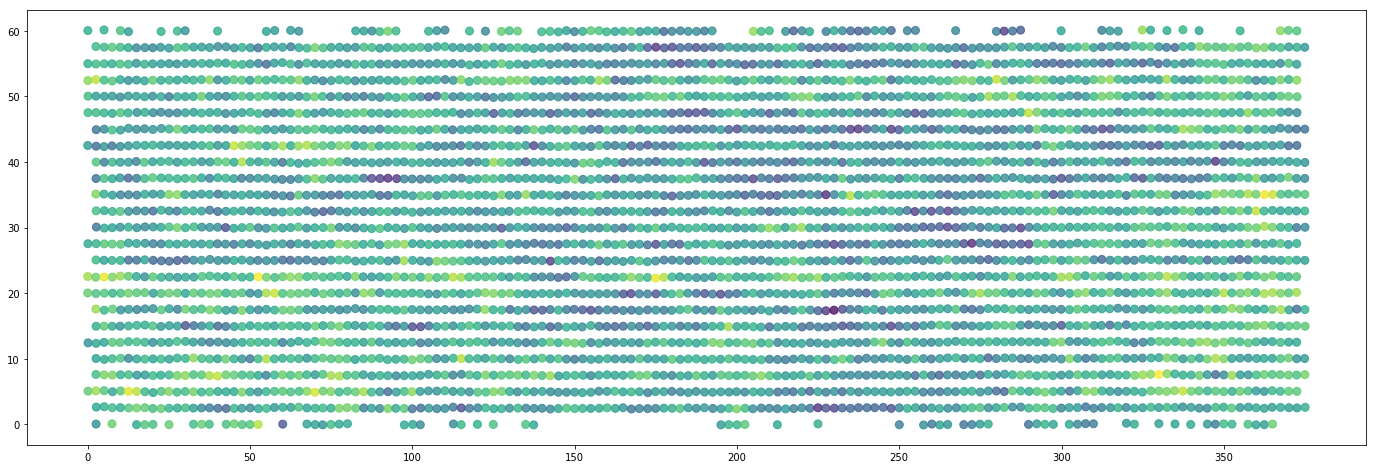

In [12]:
fig=plt.figure(figsize=(24,8))
plt.scatter(sigma['x'],sigma['y'],c=sigma['sx'],s=64,alpha=0.75)

In [13]:
## Fit Data
from matplotlib import cm
method='cubic';

z1=sigma['sx']
fmap1=interpolate.griddata(points,z1,R,method=method)


z2=sigma['sy']
fmap2=interpolate.griddata(points,z2,R,method=method)

z3=sigma['sz']
fmap3=interpolate.griddata(points,z3,R,method=method)

## Relevant python links
## Interpolation schemes:https://docs.scipy.org/doc/scipy/reference/interpolate.html
    ## https://github.com/kbarbary/Dierckx.jl from JULIA
## griddata https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html#scipy.interpolate.griddata
## Contours https://matplotlib.org/gallery/images_contours_and_fields/contour_image.html#sphx-glr-gallery-images-contours-and-fields-contour-image-py
## 
#fout=interpolate.bisplev(Xgrid.reshape(nx*ny),Ygrid.reshape(nx*ny),fmap_temp)



In [33]:
''' fmap_temp1=interpolate.bisplrep(sigma['x'],sigma['y'],z1)
fout1=interpolate.bisplev(xgrid,ygrid,fmap_temp1)

fmap_temp2=interpolate.bisplrep(sigma['x'],sigma['y'],z2)
fout2=interpolate.bisplev(xgrid,ygrid,fmap_temp2)

fmap_temp3=interpolate.bisplrep(sigma['x'],sigma['y'],z3)
fout3=interpolate.bisplev(xgrid,ygrid,fmap_temp3)


fig , ((ax1,ax2,ax3,ax4)) = plt.subplots(1,4,sharex = True,sharey=True,figsize=(16,12))
#cmap = cm.PRGn
p1=ax1.contourf(fout1,iso=1)
plt.colorbar(p1,ax=ax1)
ax1.set_title('$\sigma_{xx}$',fontsize=40)
p2=ax2.contourf(fout2,iso=1)#,cmap=cmap)
plt.colorbar(p2,ax=ax2)
ax2.set_title('$\sigma_{yy}$',fontsize=40)

p3=ax3.contourf(fout3,iso=1)#,cmap=cmap)
plt.colorbar(p3,ax=ax3)
ax3.set_title('$\sigma_{zz}$',fontsize=40)

ftotal=(fout1+fout2)/2-fout3

p4=ax4.contourf(ftotal,iso=1)#,cmap=cmap)
plt.colorbar(p4,ax=ax4)

ax4.set_title('$\sigma$',fontsize=40) '''

"fmap_temp1=interpolate.bisplrep(sigma['x'],sigma['y'],z1)\nfout1=interpolate.bisplev(xgrid,ygrid,fmap_temp1)\n\nfmap_temp2=interpolate.bisplrep(sigma['x'],sigma['y'],z2)\nfout2=interpolate.bisplev(xgrid,ygrid,fmap_temp2)\n\nfmap_temp3=interpolate.bisplrep(sigma['x'],sigma['y'],z3)\nfout3=interpolate.bisplev(xgrid,ygrid,fmap_temp3)\n\n\nfig , ((ax1,ax2,ax3,ax4)) = plt.subplots(1,4,sharex = True,sharey=True,figsize=(16,12))\n#cmap = cm.PRGn\np1=ax1.contourf(fout1,iso=1)\nplt.colorbar(p1,ax=ax1)\nax1.set_title('$\\sigma_{xx}$',fontsize=40)\np2=ax2.contourf(fout2,iso=1)#,cmap=cmap)\nplt.colorbar(p2,ax=ax2)\nax2.set_title('$\\sigma_{yy}$',fontsize=40)\n\np3=ax3.contourf(fout3,iso=1)#,cmap=cmap)\nplt.colorbar(p3,ax=ax3)\nax3.set_title('$\\sigma_{zz}$',fontsize=40)\n\nftotal=(fout1+fout2)/2-fout3\n\np4=ax4.contourf(ftotal,iso=1)#,cmap=cmap)\nplt.colorbar(p4,ax=ax4)\n\nax4.set_title('$\\sigma$',fontsize=40)"

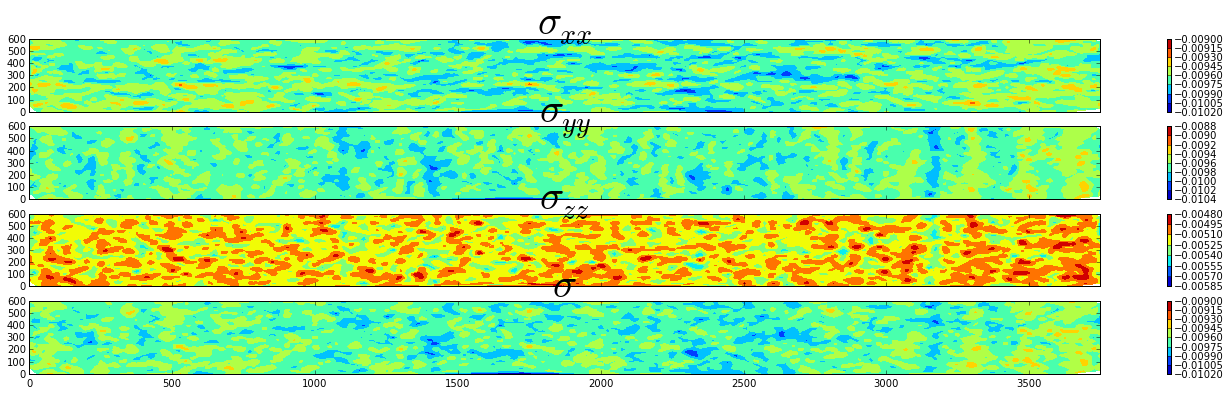

In [36]:
## Plot Data
fig , ((ax1,ax2,ax3,ax4)) = plt.subplots(4, 1,sharex = True,sharey=True,figsize=(24,6))
#cmap = cm.PRGn
p1=ax1.contourf(fmap1.reshape(ny,nx),iso=1)
plt.colorbar(p1,ax=ax1)
ax1.set_title('$\sigma_{xx}$',fontsize=40)
p2=ax2.contourf(fmap2.reshape(ny,nx),iso=1)#,cmap=cmap)
plt.colorbar(p2,ax=ax2)
ax2.set_title('$\sigma_{yy}$',fontsize=40)

p3=ax3.contourf(fmap3.reshape(ny,nx),iso=1)#,cmap=cmap)
plt.colorbar(p3,ax=ax3)
ax3.set_title('$\sigma_{zz}$',fontsize=40)

ftotal=(fmap1+fmap2)/2

p4=ax4.contourf(ftotal.reshape(ny,nx),iso=1)#,cmap=cmap)
plt.colorbar(p4,ax=ax4)

ax4.set_title('$\sigma$',fontsize=40)

## Data Analysis

### Comparision of stresses in the solid (how <font color=red>deep</font> does it go??)

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import interpolate

sb=pd.read_table('stress_bulk.out',delimiter=' ',names=['id','x','y','sx','sy','sz','temp'],index_col=None)
ss=pd.read_table('stress_surf.out',delimiter=' ',names=['id','x','y','sx','sy','sz','temp'],index_col=None)
sb=sb.drop(['temp','id'],axis=1)
ss=ss.drop(['temp','id'],axis=1)



## Things to DO

Now simulations are RUNNING

1. Compute Stress
    + Solid-liquid 
    + Reference solid-solid 

2. Velocity correlation can be tested after equilibration

3. Deformation of the solid 
    
      + Needs computation of average position of the solid atoms


### Programs needed
1. Averaging and plotting contours
2. Need to determine the contactline quantitatively

## Daily Updates
<div class="alert alert-block alert-success"> 15-05-2018</div> 
   1. Submitted jobs (5x5) and different $\epsilon$ and _K_ values <br>
   2. Have problems with **computing 2D Density** of any other contours <br>
   3. After equilibration, makes sense to **output** trajectories or find better ways
    
<div class="alert alert-block alert-success"> 16-05-2018</div>

1. Noticed that K=0.1 is **too soft** ---> not a solid 
2. So, gathered reference experimental data. A solid should have a Bulk Modulus of **at least ~30 GPa** 
3. Now, choose paramters accordingly (__K>=4__)
4. Stress on solids in x-y direction? ---> There is a stress of ~100 atm (for barostat Peq=1 in xy only) for all the solids
 + trying out barostat with 0 presssure and smaller time constant <br>
 + IS FINE
5. z-direction? NPT seems unstable?? WTF is wrong here??
6. Submitted 5 K values (2 new) and 6 epsilon values ... running ...needs checking

<div class='alert alert-block alert-success'> 17-05-18</div> 

1. Wetting strength too strong for $\epsilon>0.3$ $\rightarrow$ full wetting-regime. ${W^{Max}_{SL}=100 mJ/m^2}$
2. The expected equilibrium distances are not really what is observed ($L_x=375;L_y=60$) and therefore stress can not be directly measured from the strain...
    $\Longrightarrow$compute equilibrium distance at 0 pressure? <br>
3. Compute Pressure distribution in Solid ...<br> 
    $\Longrightarrow$ with xy barostatting vs. w/o barostatting??? <br>
4. $L_x, L_y$ are strictly dependent on $K$ --- varies from 372.5 to 375 in x and 59.6 to 60 in y
   + $\Rightarrow$ Checked influence of initial structure minimization --- None Found  $\huge \color{green} \checkmark$
   <div class="shadowbox"><p>The above is important stuff and needs to discussed</p></div> 
   
5. Contours pending 


<div class='alert alert-block alert-success'> 18-05-18</div>

1. Contour works --- first to be interpolated and then mapped onto a grid
Contour was <font color=red>WRONG</font>

<div class='alert alert-block alert-success'>22-05-18 </div>

To do 

1. Way to evaluate and plot contours nicely
2. Make consistency checks, homogeneous in x-y and difference in z
    bulk vs. surface and stuff 
3. Compute stresses for real systems ... influence of Pxy still needs to be understood 
4. Way to evaluate surface free energy of solids as a function of K

What is done

1. Contour plots using two independent methods 
    x-y problem 
2. DONE (kinda)
3. going on 
4. <font color=red> NOPE</font>

<div class='alert alert-block alert-success'> 23-05-2018</div>

<font color=red> To Do </font>

1. Contour benchmarking 
    + Surface vs. Bulk $\Rightarrow$ Solid only
2. Surface free-energy of different solids $\gamma_S$
3. Compute stresses for the Systems
    + Technical details, convergence ...


<font color=green>What's Done</font>

1. 
2. 
3. Pressures take long times to converge --- NEED to run long time scales for good results (>10ns)

$\Rightarrow$

   + compare bulk vs. surface stresss
    + compare NPT vs. NVT for the solid
    + Compute for the large droplet system and compare NVT (composite - reference) and NPT (composite - ref)
    
<div class='alert alert-block alert-success'>24-05-2018</div>

$\Rightarrow$ Barostatting has issues with the size and kind of barostatting

$\Rightarrow$ Made a choice to stick to NVT ... Should not be a problem as we always compute reference stresses 

<font color=red> To DO</font>

$\Rightarrow$ Under NVT

1. Characterize stresses in the solid phase --- Bulk and surface at different values of *K*
2. Compute droplet induced stresses compared to a reference set at *K*=10 first

<div class='alert alert-block alert-success'>25-05-2018</div>

<font color=green>DONE</font>

1. Simulations ran for 3 *K* values of reference solid and 3\*3 values of $\epsilon_{SL}$ 

<font color=red>To Do</font>

1. Gather data and use plotting, analysing and modifiying using Pandas


<div class='alert alert-block alert-success'>29-05-2018</div>

1. First data has two problems
   + Reference solid stresss distributions is not symmetric in Z... both surfaces are not identical???
   + Liquid induced bonded stress in x and y directions does not decay as we go deeper in to the solid .. but does in x ...something wrong?
   
2. To solve
    + Maybe NPT vs. NVT? running simulations for the reference solid under both NPT and NVT conditions ... might give some insights??
    
<div align=center class='alert alert-block alert-warning'> June 01, 2018 </div>
1. Only problem is now is understanding the 'z' variation of bond-stresses ...why aren't the droplet induced stresses reappearing after 5th or 6th layers???
    + $\Rightarrow$ to this end, rechecking the calculations by performing NPxyT and NVT
2. On the numerical front, compute contact lines using the density profile in x-direction within the first layer (on both the sides)

3. <font color=red>fix momentum </font> is not enough... make it more frequent and only on water

<div class='alert alert-block alert-success'> June 6, 2018</div>

1. Need to work on literature ... have to understand more about the forces acting around the contact line 
2. Still need to fix the problem with stresses (most important)

### Markdown Experiments
html:
<div align=center style="background-color:lightblue" "align=center" "size=50" class="important"> <h5>Try out</h5> <p>This is the example para</p></div>

<div class="shadowbox">
  <p>Here's a very interesting note displayed in a
  lovely shadowed box.</p>
</div>


In [38]:
HTML('''
<div "align=center" "size=50" class="important"> <h5>Try out</h5> <p>This is the example para</p></div>

<div class="shadowbox">
  <p>Here's a very interesting note displayed in a
  lovely shadowed box.</p>
</div> <style> .important{background-color: yellow;}</style>''')

NameError: name 'HTML' is not defined

In [39]:
## Pandas testing
import numpy as np
import pandas as pd
A=np.random.random((1000,6));
B=np.array(['A','B','C','D','E','F'])
C=pd.DataFrame(A,columns=B)

In [40]:
D=C.sort('A').reset_index(drop=True)

In [41]:
D.apply(np.max).min()

0.9965561321427613

In [84]:
## Userful pandas

#assign() to add columns with some operations
#query() to filter data

In [32]:
Q=pd.read_table('stress_bulk.out',delimiter=' ',index_col=None,names=['x','y','sy','sx','sz','temp'])
new=Q.dropna(axis=1)
#n